### Q2. Density estimation: Psychological experiments

#### Part A

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [35]:
brain_data = pd.read_csv("n90pol.csv")

acc_volume = np.array(brain_data['acc']).reshape(-1, 1)
amygdala_volume = np.array(brain_data['amygdala']).reshape(-1, 1)

num_bins = 15

In [36]:
plt.hist(acc_volume, bins=num_bins, edgecolor='black', alpha=0.7, color='blue', density=True)
plt.title("Anterior Cingulate Cortex (ACC) - Histogram")
plt.xlabel("Volume")
plt.ylabel("Density")
plt.savefig("q2-output/hist_acc.png")

In [37]:
plt.hist(amygdala_volume, bins=num_bins, edgecolor='black', alpha=0.7, color='green', density=True)
plt.title("Amygdala - Histogram")
plt.xlabel("Volume")
plt.ylabel("Density")
plt.savefig("q2-output/hist_amygdala.png")

In [38]:
bandwidth = 0.01
x_range_acc = np.linspace(acc_volume.min(), acc_volume.max(), 1000).reshape(-1, 1)
x_range_amygdala = np.linspace(amygdala_volume.min(), amygdala_volume.max(), 1000).reshape(-1, 1)

In [39]:
kde_acc = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(acc_volume)
log_density_acc = kde_acc.score_samples(x_range_acc)
plt.plot(x_range_acc, np.exp(log_density_acc), color='blue', label="ACC KDE")
plt.title("Anterior Cingulate Cortex (ACC) - KDE")
plt.xlabel("Volume")
plt.ylabel("Density")
plt.legend()
plt.savefig("q2-output/kde_acc.png")

In [40]:
kde_amygdala = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(amygdala_volume)
log_density_amygdala = kde_amygdala.score_samples(x_range_amygdala)
plt.plot(x_range_amygdala, np.exp(log_density_amygdala), color='green', label="Amygdala KDE")
plt.title("Amygdala - KDE")
plt.xlabel("Volume")
plt.ylabel("Density")
plt.legend()
plt.savefig("q2-output/kde_amygdala.png")

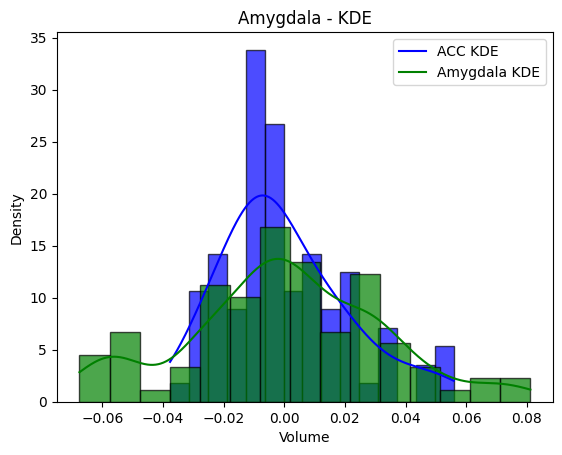

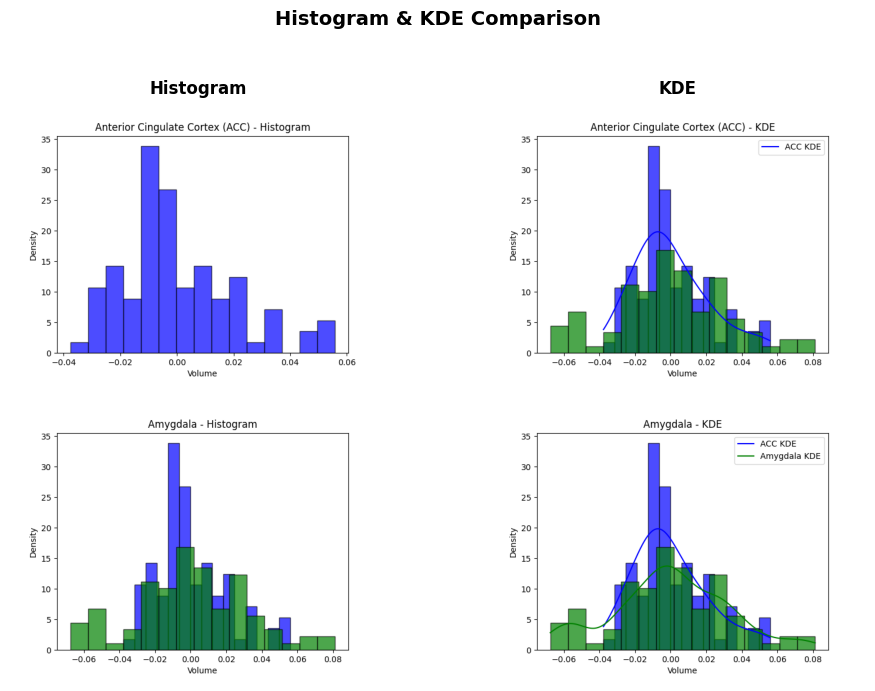

In [ ]:
hist_acc = plt.imread("q2-output/hist_acc.png")
kde_acc = plt.imread("q2-output/kde_acc.png")
hist_amygdala = plt.imread("q2-output/hist_amygdala.png")
kde_amygdala = plt.imread("q2-output/kde_amygdala.png")

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

fig.suptitle("Histogram & KDE Comparison", fontsize=14, fontweight="bold")
axes[0, 0].set_title("Histogram", fontsize=12, fontweight="bold")
axes[0, 1].set_title("KDE", fontsize=12, fontweight="bold")

axes[0, 0].imshow(hist_acc)
axes[0, 1].imshow(kde_acc)
axes[1, 0].imshow(hist_amygdala)
axes[1, 1].imshow(kde_amygdala)

axes[0, 0].set_ylabel("ACC", fontsize=12, fontweight="bold")
axes[1, 0].set_ylabel("Amygdala", fontsize=12, fontweight="bold")

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("q2-output/kde_hist_comparison.png")
plt.show()

#### Part B

In [42]:
from matplotlib import cm

/var/folders/rx/4mtzy3y13t9f2njmm29j60pm0000gp/T/ipykernel_55792/2177707323.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("jet")


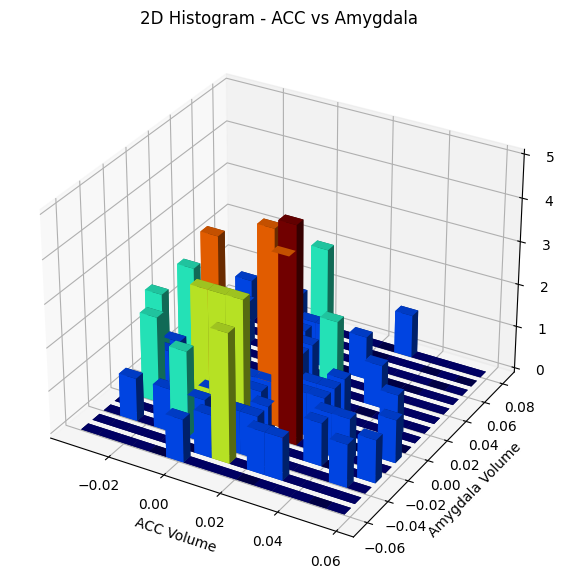

In [43]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

acc_vol = brain_data["acc"].to_numpy()
amygdala_vol = brain_data["amygdala"].to_numpy()

histogram, x_edges, y_edges = np.histogram2d(acc_vol, amygdala_vol, bins=(num_bins, num_bins))

x_pos, y_pos = np.meshgrid(x_edges[:-1] + x_edges[1:], y_edges[:-1] + y_edges[1:])
x_pos = x_pos.flatten() / 2
y_pos = y_pos.flatten() / 2
z_pos = np.zeros_like(x_pos)

dx = dy = (x_edges[1] - x_edges[0])
dz = histogram.flatten()

color_map = cm.get_cmap("jet")
max_height = np.max(dz) if np.max(dz) > 0 else 1
min_height = np.min(dz)
rgba_colors = [color_map((h - min_height) / max_height) for h in dz]

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=rgba_colors, zsort="average")

ax.set_title("2D Histogram - ACC vs Amygdala")
ax.set_xlabel("ACC Volume")
ax.set_ylabel("Amygdala Volume")
ax.set_zlabel("Frequency")

plt.savefig("q2-output/hist_2D_acc_amygdala.png")
plt.show()

#### Part C

In [44]:
import scipy.stats as st

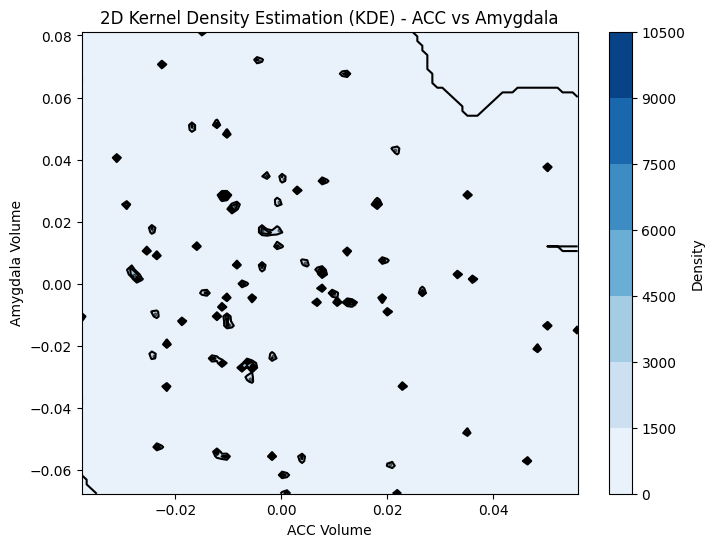

In [45]:
bandwidth = 0.02

xmin, xmax = acc_vol.min(), acc_vol.max()
ymin, ymax = amygdala_vol.min(), amygdala_vol.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([acc_vol, amygdala_vol])

kde_2d = st.gaussian_kde(values, bw_method=bandwidth)
density_estimate = np.reshape(kde_2d(positions).T, xx.shape)

fig, ax = plt.subplots(figsize=(8, 6))
cfset = ax.contourf(xx, yy, density_estimate, cmap='Blues')
cset = ax.contour(xx, yy, density_estimate, colors='k')
ax.plot(acc_vol, amygdala_vol, 'o', markersize=2, color='black', alpha=0.5)

ax.set_xlabel("ACC Volume")
ax.set_ylabel("Amygdala Volume")
ax.set_title("2D Kernel Density Estimation (KDE) - ACC vs Amygdala")
plt.colorbar(cfset, label="Density")

plt.savefig("q2-output/kde_2d_acc_amygdala.png")
plt.show()


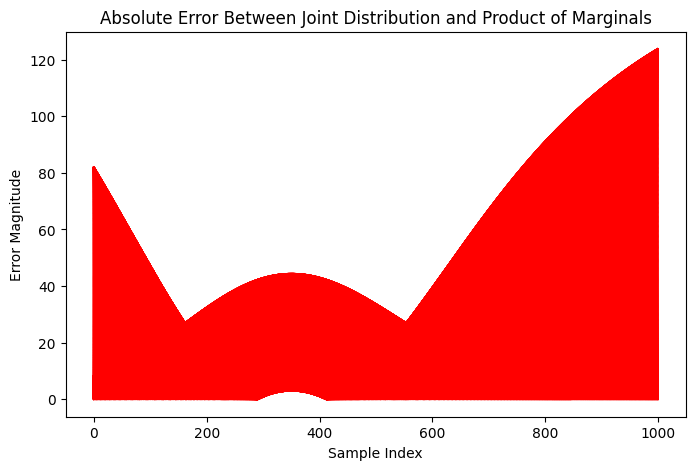

In [46]:
X_eval = np.linspace(min(acc_vol), max(acc_vol), 1000)[:, np.newaxis]
Y_eval = np.linspace(min(amygdala_vol), max(amygdala_vol), 1000)[:, np.newaxis]

kde_acc = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(acc_vol.reshape(-1, 1))
kde_amygdala = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(amygdala_vol.reshape(-1, 1))

log_density_acc = kde_acc.score_samples(X_eval)
log_density_amygdala = kde_amygdala.score_samples(Y_eval)

joint_values = np.vstack([acc_vol, amygdala_vol])
kde_joint = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(joint_values.T)
log_density_joint = kde_joint.score_samples(np.hstack([X_eval, Y_eval]))

marginal_product = log_density_acc[:, np.newaxis] + log_density_amygdala

abs_error = np.abs(np.exp(log_density_joint) - np.exp(marginal_product))

plt.figure(figsize=(8, 5))
plt.plot(abs_error, color='red')
plt.title("Absolute Error Between Joint Distribution and Product of Marginals")
plt.xlabel("Sample Index")
plt.ylabel("Error Magnitude")
plt.savefig("q2-output/error_independence_check.png")
plt.show()

#### Part D

In [47]:
from sklearn.neighbors import KernelDensity

In [48]:
x_range = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]
bandwidth = 0.01

conditional_means = {"amygdala": {}, "acc": {}}

for c in range(2, 6):
    print(f"Processing Orientation: {c}")
    subset = brain_data[brain_data["orientation"] == c]
    acc_values = np.array(subset["acc"]).reshape(-1, 1)
    amygdala_values = np.array(subset["amygdala"]).reshape(-1, 1)
    kde_acc = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(acc_values)
    kde_amygdala = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(amygdala_values)
    log_density_acc = kde_acc.score_samples(x_range)
    log_density_amygdala = kde_amygdala.score_samples(x_range)
    
    plt.figure(figsize=(6, 4))
    plt.plot(x_range, np.exp(log_density_acc), color="blue", label=f"ACC | Orientation {c}")
    plt.title(f"ACC Conditional Density (c={c})")
    plt.xlabel("ACC Volume")
    plt.ylabel("Density")
    plt.legend()
    plt.savefig(f"q2-output/acc_kde_c{c}.png")
    plt.clf()

    plt.figure(figsize=(6, 4))
    plt.plot(x_range, np.exp(log_density_amygdala), color="green", label=f"Amygdala | Orientation {c}")
    plt.title(f"Amygdala Conditional Density (c={c})")
    plt.xlabel("Amygdala Volume")
    plt.ylabel("Density")
    plt.legend()
    plt.savefig(f"q2-output/amygdala_kde_c{c}.png")
    plt.clf()
    
    conditional_means["acc"][c] = np.mean(acc_values)
    conditional_means["amygdala"][c] = np.mean(amygdala_values)

    print(f"ACC Mean (c={c}): {round(conditional_means['acc'][c], 2)}")
    print(f"Amygdala Mean (c={c}): {round(conditional_means['amygdala'][c], 2)}\n")

print("\nConditional Sample Means:")
print(pd.DataFrame(conditional_means))


Processing Orientation: 2
ACC Mean (c=2): -0.01
Amygdala Mean (c=2): 0.02

Processing Orientation: 3
ACC Mean (c=3): 0.0
Amygdala Mean (c=3): 0.0

Processing Orientation: 4
ACC Mean (c=4): 0.0
Amygdala Mean (c=4): -0.0

Processing Orientation: 5
ACC Mean (c=5): 0.01
Amygdala Mean (c=5): -0.01


Conditional Sample Means:
   amygdala       acc
2  0.019062 -0.014769
3  0.000588  0.001671
4 -0.004720  0.001310
5 -0.005692  0.008142


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

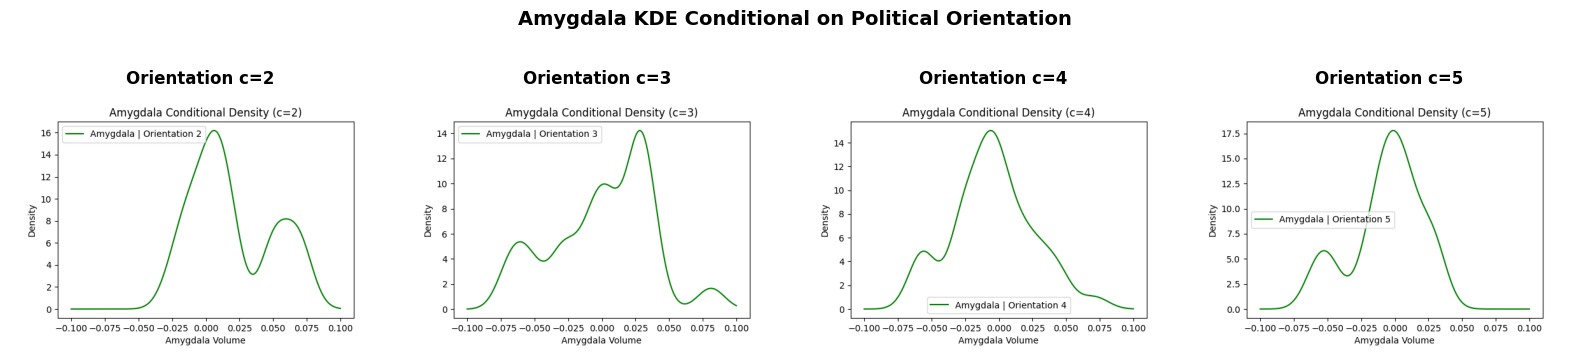

In [ ]:
amygdala_kde_c2 = plt.imread("q2-output/amygdala_kde_c2.png")
amygdala_kde_c3 = plt.imread("q2-output/amygdala_kde_c3.png")
amygdala_kde_c4 = plt.imread("q2-output/amygdala_kde_c4.png")
amygdala_kde_c5 = plt.imread("q2-output/amygdala_kde_c5.png")

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle("Amygdala KDE Conditional on Political Orientation", fontsize=14, fontweight="bold")

orientations = ["c=2", "c=3", "c=4", "c=5"]
images = [amygdala_kde_c2, amygdala_kde_c3, amygdala_kde_c4, amygdala_kde_c5]

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"Orientation {orientations[i]}", fontsize=12, fontweight="bold")
    ax.axis("off")

plt.tight_layout()
plt.savefig("q2-output/amygdala_kde_table.png")
plt.show()

#### Part E

In [50]:
bandwidth = 0.02

for c in range(2, 6):
    print(f"Processing Orientation: {c}")
    subset = brain_data[brain_data["orientation"] == c]
    acc_values = subset["acc"].to_numpy()
    amygdala_values = subset["amygdala"].to_numpy()

    data_joint = np.vstack([acc_values, amygdala_values])
    kde_2d = st.gaussian_kde(data_joint, bw_method=bandwidth)

    x_min, x_max = acc_values.min(), acc_values.max()
    y_min, y_max = amygdala_values.min(), amygdala_values.max()
    xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_positions = np.vstack([xx.ravel(), yy.ravel()])
    
    density_estimate = np.reshape(kde_2d(grid_positions).T, xx.shape)

    fig, ax = plt.subplots(figsize=(7, 5))
    cfset = ax.contourf(xx, yy, density_estimate, cmap="Blues")
    cset = ax.contour(xx, yy, density_estimate, colors="black")
    ax.scatter(acc_values, amygdala_values, s=5, color="black", alpha=0.5, label="Data Points")

    ax.set_xlabel("ACC Volume")
    ax.set_ylabel("Amygdala Volume")
    ax.set_title(f"2D KDE - Joint Distribution (c={c})")
    ax.legend()
    plt.colorbar(cfset, label="Density")
    plt.savefig(f"q2-output/joint_kde_c{c}.png")
    plt.clf()

Processing Orientation: 2
Processing Orientation: 3
Processing Orientation: 4
Processing Orientation: 5


<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

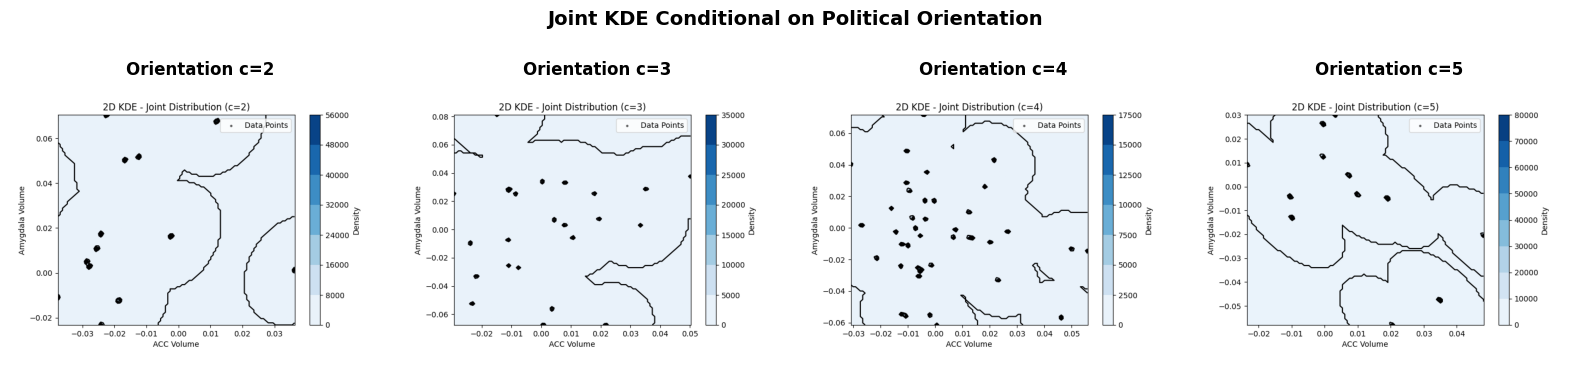

In [ ]:
joint_kde_c2 = plt.imread("q2-output/joint_kde_c2.png")
joint_kde_c3 = plt.imread("q2-output/joint_kde_c3.png")
joint_kde_c4 = plt.imread("q2-output/joint_kde_c4.png")
joint_kde_c5 = plt.imread("q2-output/joint_kde_c5.png")

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle("Joint KDE Conditional on Political Orientation", fontsize=14, fontweight="bold")

orientations = ["c=2", "c=3", "c=4", "c=5"]
images = [joint_kde_c2, joint_kde_c3, joint_kde_c4, joint_kde_c5]

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"Orientation {orientations[i]}", fontsize=12, fontweight="bold")
    ax.axis("off")

plt.tight_layout()
plt.savefig("q2-output/joint_kde_table.png")
plt.show()

### Q3. Implementing EM for MNIST dataset

#### Part A

In [60]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [61]:
data = spio.loadmat("data.mat", squeeze_me=True)["data"].T
labels = spio.loadmat("label.mat", squeeze_me=True)["trueLabel"]

selected = (labels == 2) | (labels == 6)
data = data[selected]
labels = labels[selected]
m, n = data.shape

C = np.matmul(data.T, data) / m

d = 4
V, Sig, _ = np.linalg.svd(C)
V = V[:, :d]

pdata = np.dot(data, V)
K = 2
maxIter = 100
tol = 1e-3

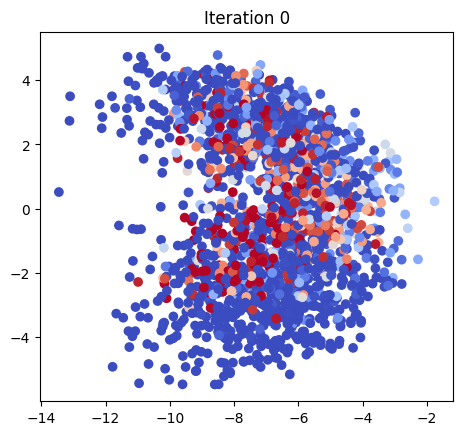

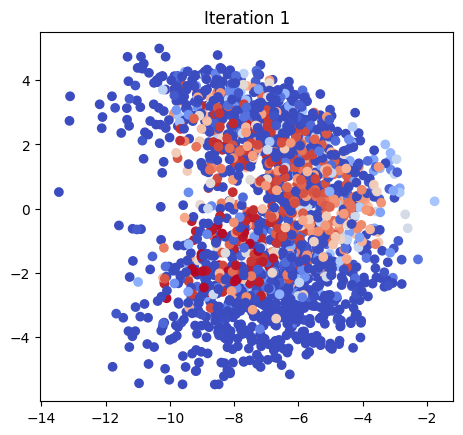

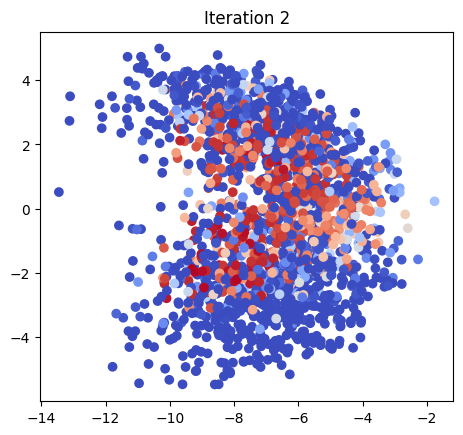

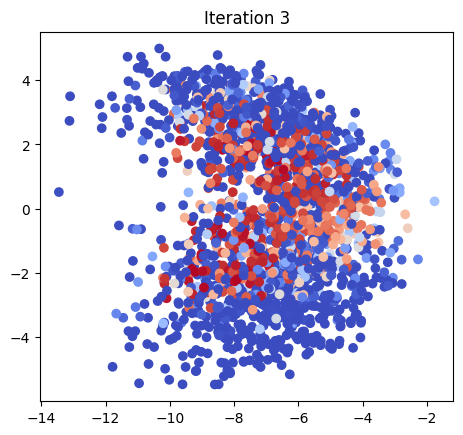

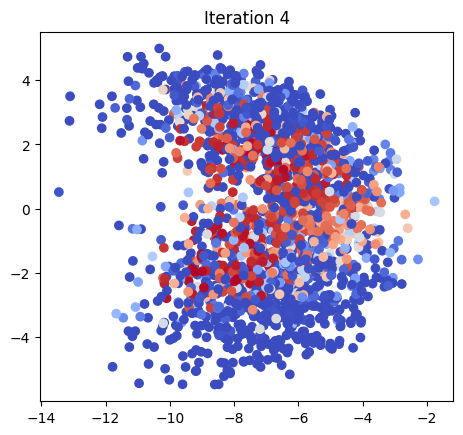

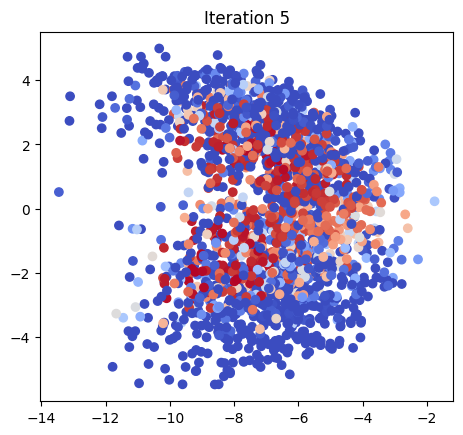

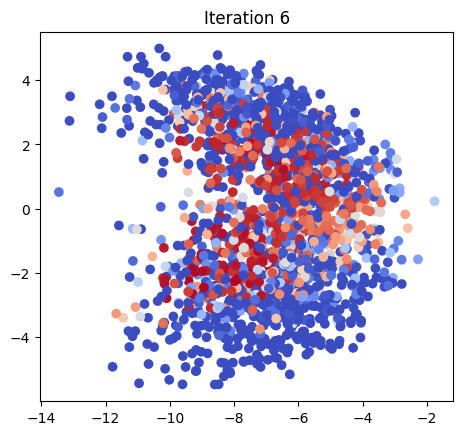

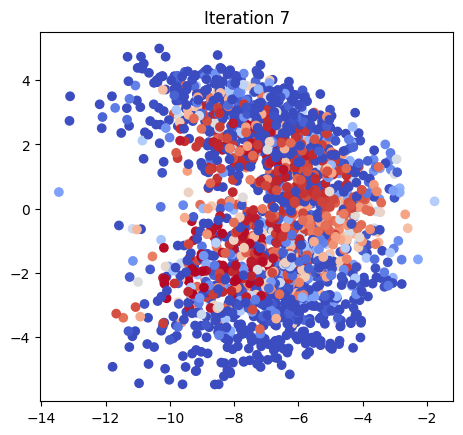

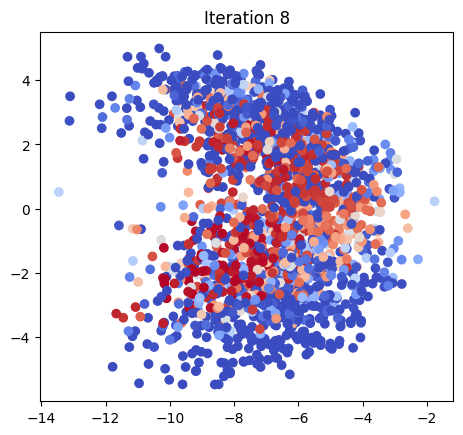

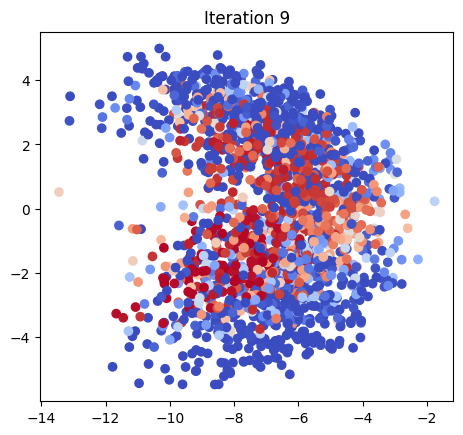

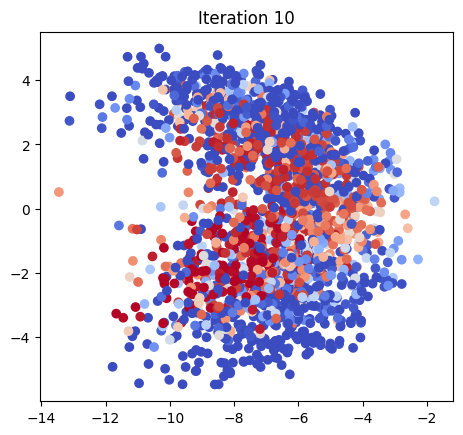

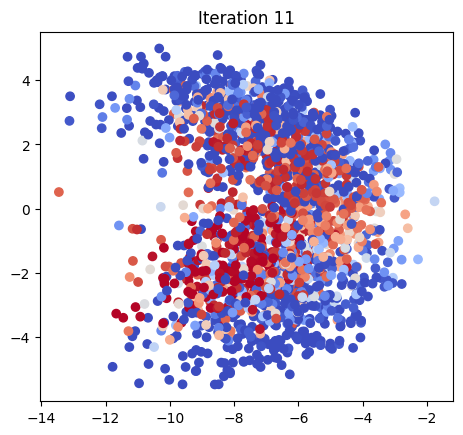

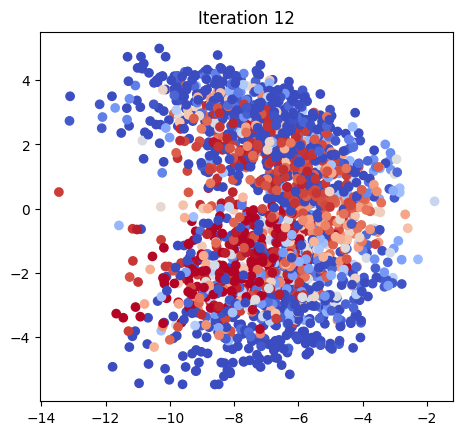

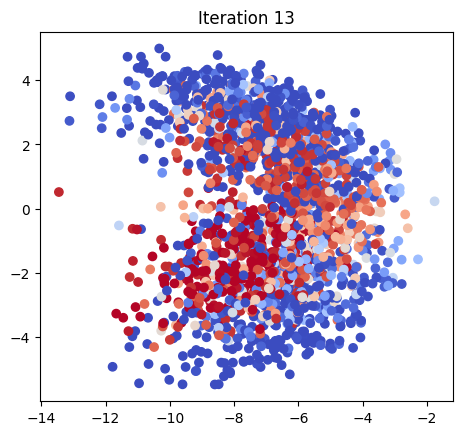

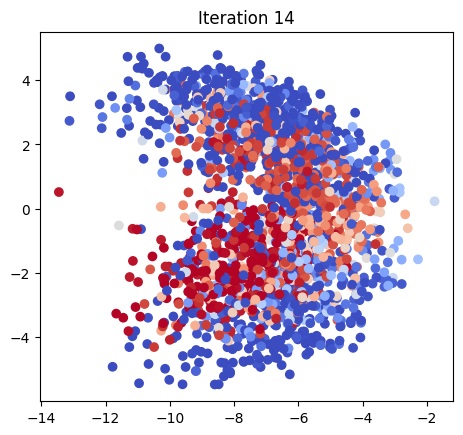

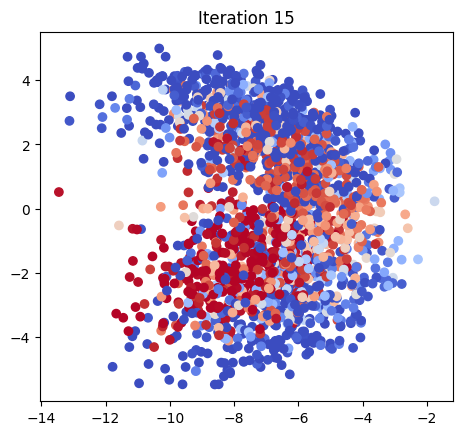

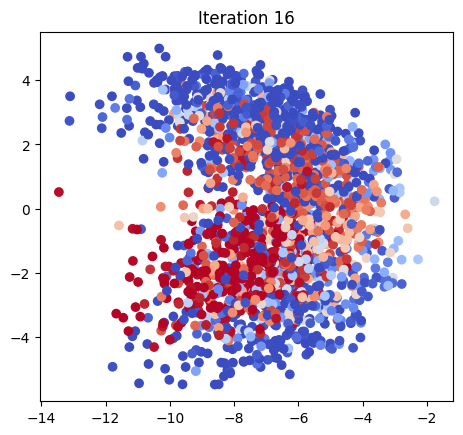

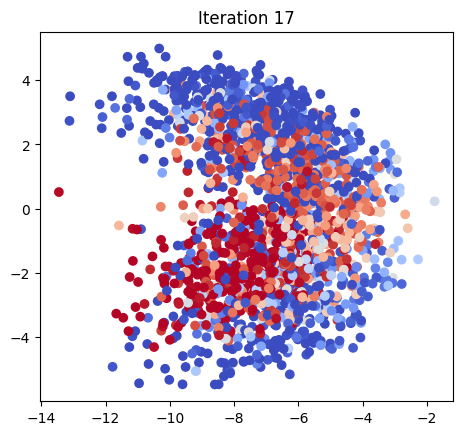

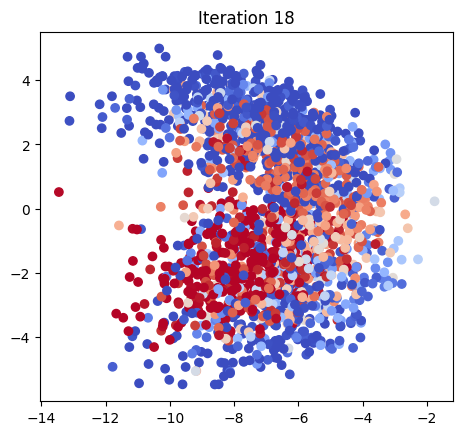

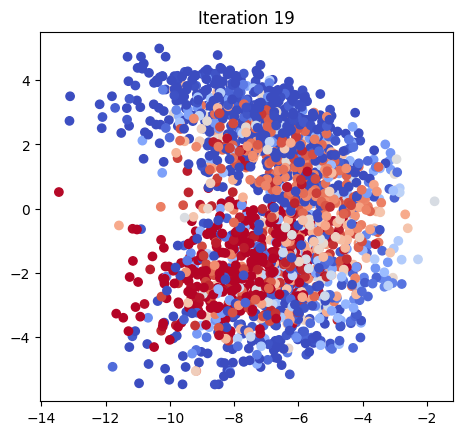

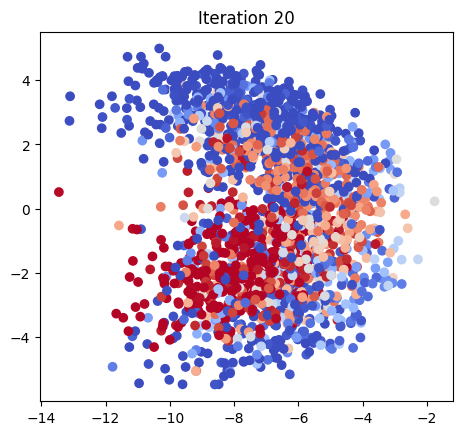

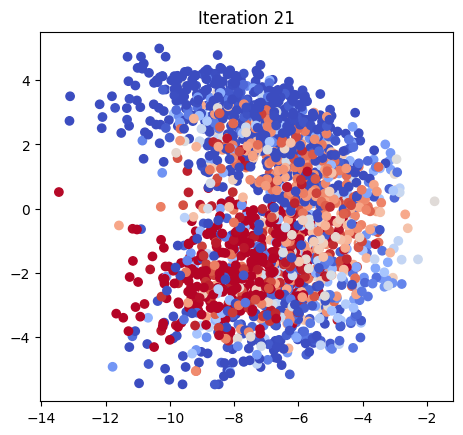

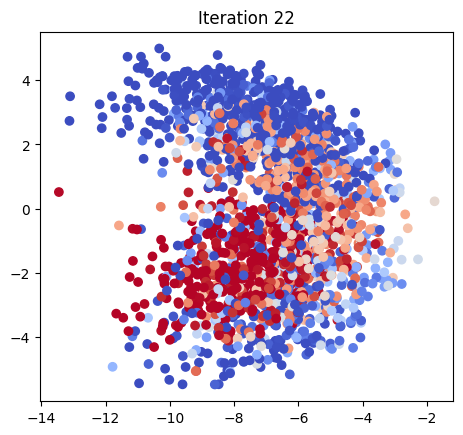

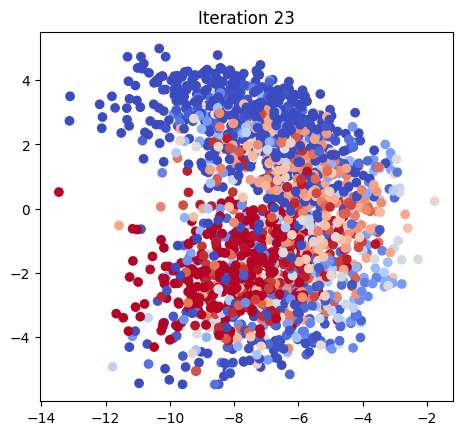

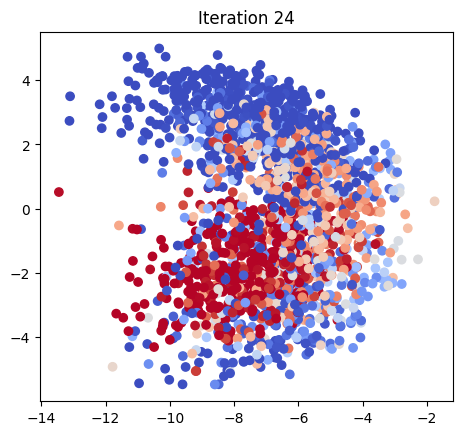

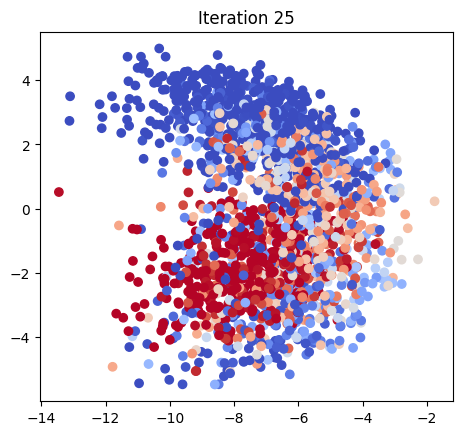

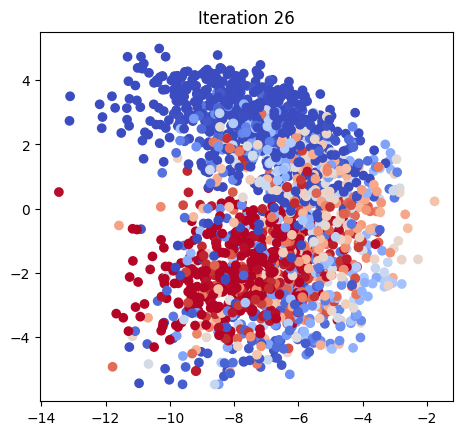

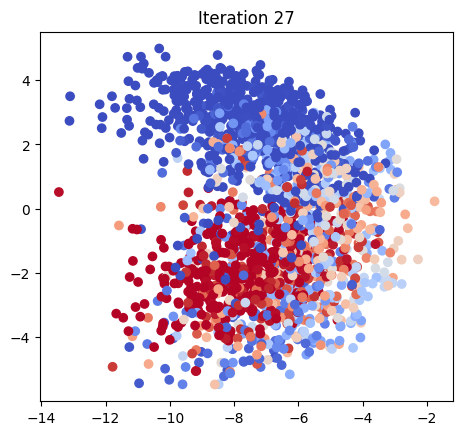

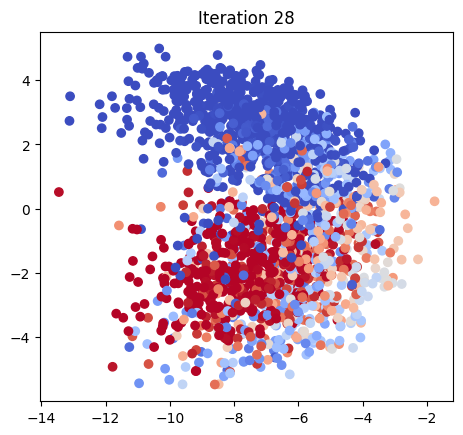

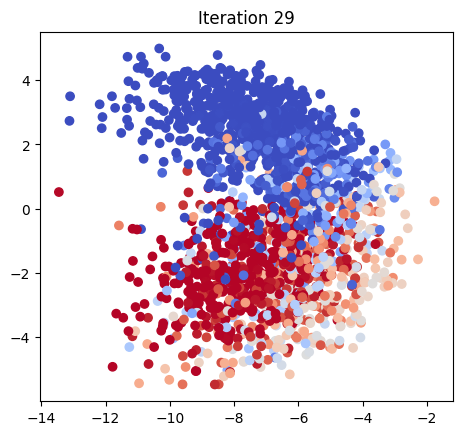

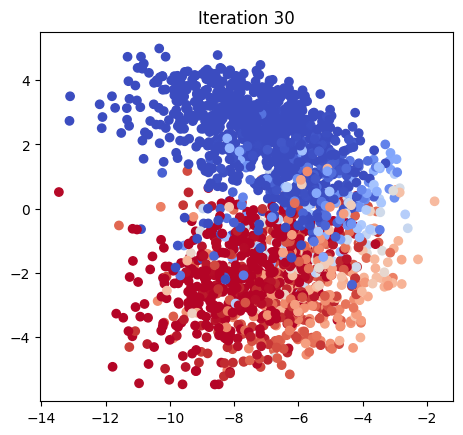

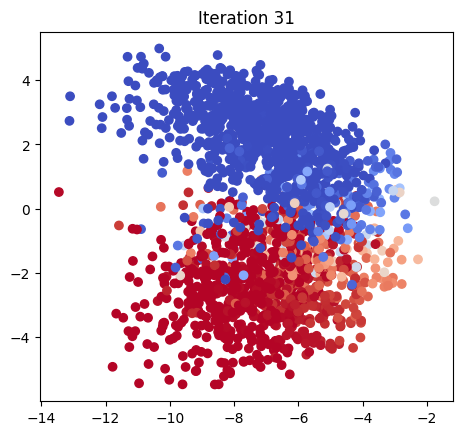

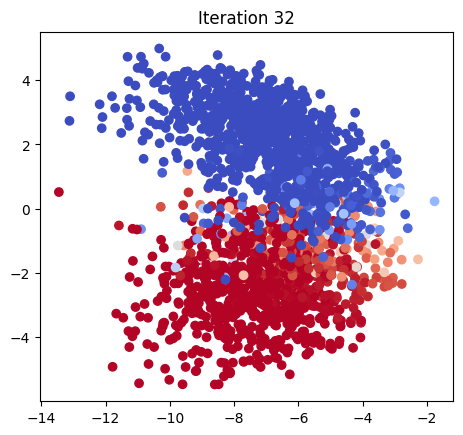

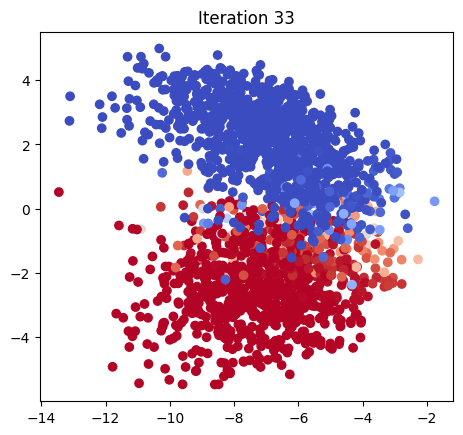

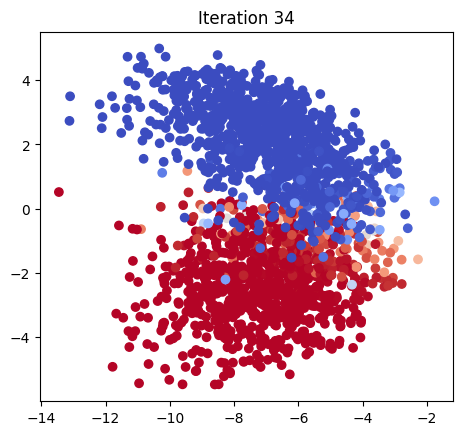

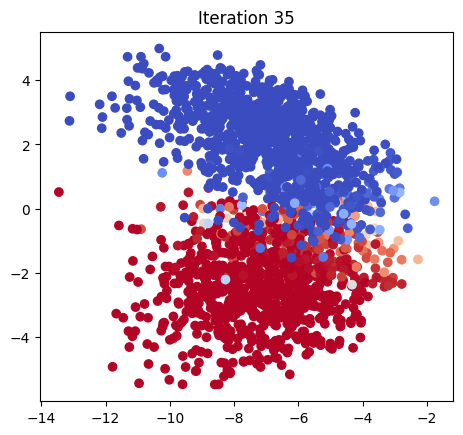

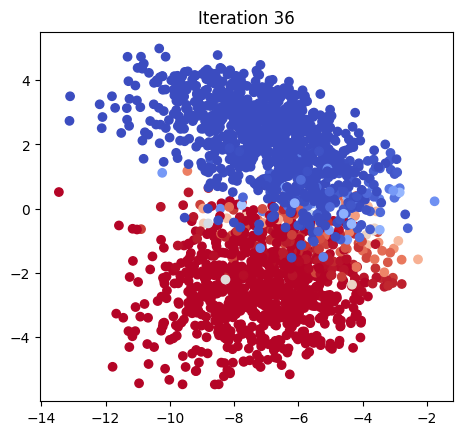

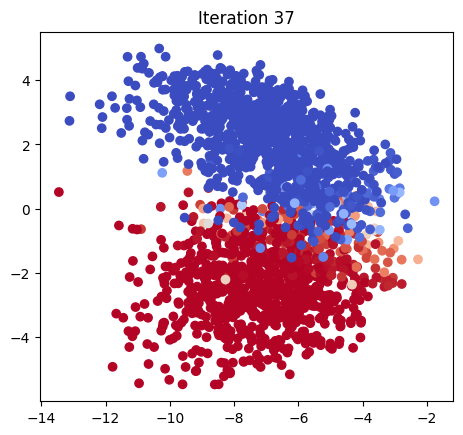

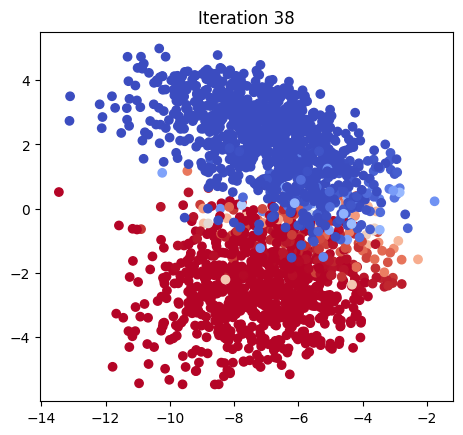

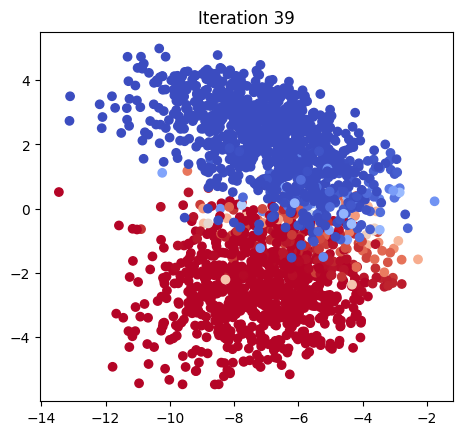

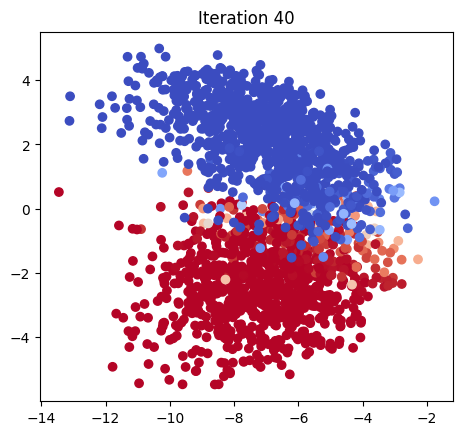

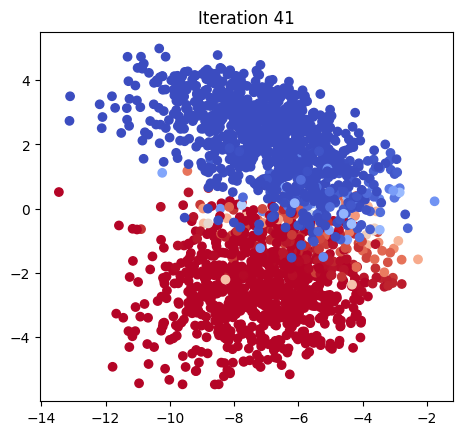

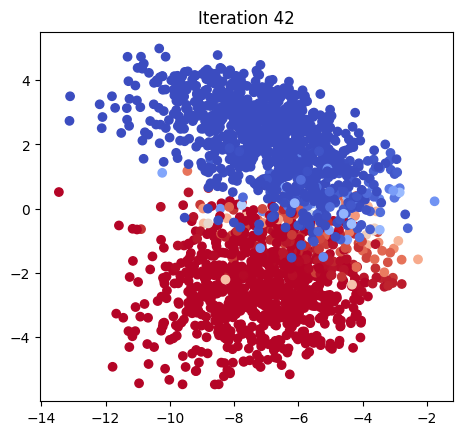

Converged at iteration 42


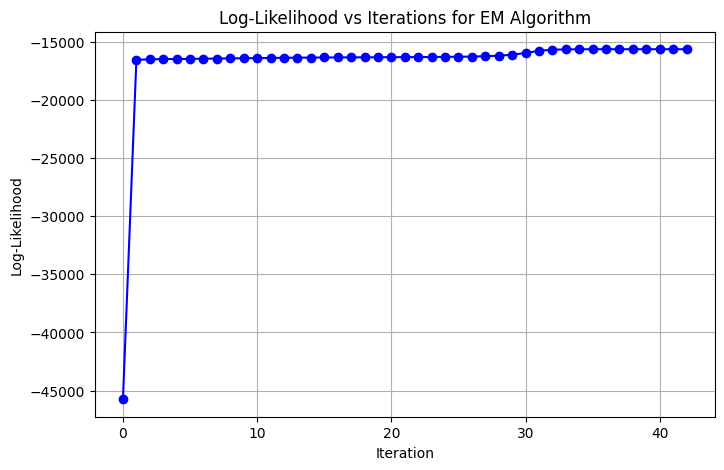

In [63]:
np.random.seed(42)

mu = np.random.randn(K, d)
S1 = np.random.randn(d, d)
S2 = np.random.randn(d, d)
sigma = [S1 @ S1.T + np.eye(d), S2 @ S2.T + np.eye(d)]

pi = np.ones(K) / K
tau = np.full((m, K), fill_value=0.0)

log_likelihood = []
iter_count = []

plt.ion()

for ii in range(maxIter):
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
    
    sum_tau = np.sum(tau, axis=1).reshape(m, 1)
    tau = tau / sum_tau

    for kk in range(K):
        pi[kk] = np.sum(tau[:, kk]) / m
        mu[kk] = pdata.T @ tau[:, kk] / np.sum(tau[:, kk])
        diff = pdata - mu[kk]
        sigma[kk] = diff.T @ np.diag(tau[:, kk]) @ diff / np.sum(tau[:, kk])

    log_likelihood.append(np.sum(np.log(sum_tau)))
    iter_count.append(ii)

    plt.scatter(pdata[:, 0], pdata[:, 1], c=tau[:, 0], cmap="coolwarm")
    plt.axis("scaled")
    plt.title(f"Iteration {ii}")
    plt.draw()
    plt.pause(0.1)

    if ii > 0 and abs(log_likelihood[-1] - log_likelihood[-2]) < tol:
        print(f"Converged at iteration {ii}")
        break

plt.ioff()

plt.figure(figsize=(8, 5))
plt.plot(iter_count, log_likelihood, marker="o", linestyle="-", color="b")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Iterations for EM Algorithm")
plt.grid()
plt.savefig("q3-output/loglikelihood.jpg")
plt.show()


#### Part B

In [64]:
import seaborn as sns
from scipy import ndimage

Component Weights (pi): [0.48664255 0.51335745]
Component Means (Projected 4D): [[-7.00001287 -2.19865077 -0.08339913  0.31346658]
 [-6.86363     1.98171505  0.07006151 -0.47653382]]


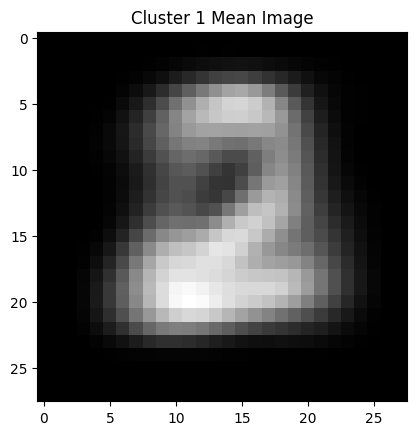

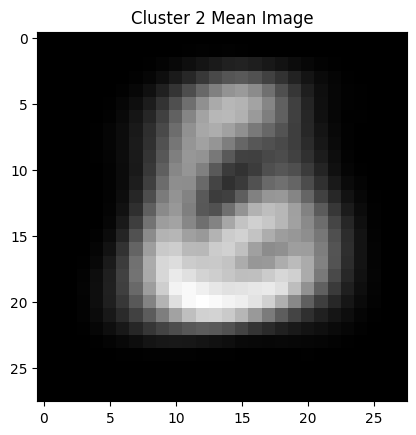

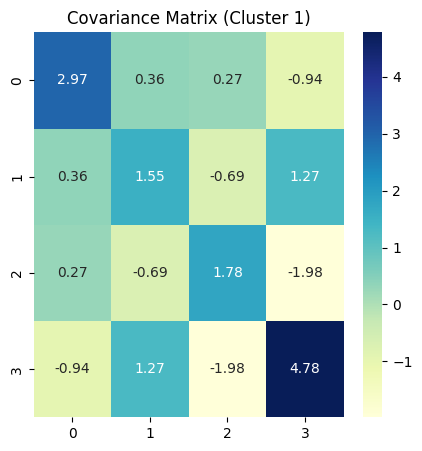

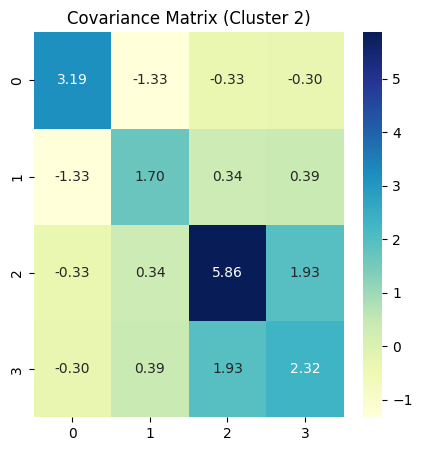

In [65]:
print("Component Weights (pi):", pi)
print("Component Means (Projected 4D):", mu)

image1 = (V @ np.diag(np.sqrt(Sig[:d])) @ mu[0]).reshape(28, 28)
image1 = np.fliplr(image1)
image1 = ndimage.rotate(image1, 90, reshape=False)
plt.imshow(image1, cmap="gray")
plt.title("Cluster 1 Mean Image")
plt.savefig("q3-output/mean_image_1.jpg")
plt.show()

image2 = (V @ np.diag(np.sqrt(Sig[:d])) @ mu[1]).reshape(28, 28)
image2 = np.fliplr(image2)
image2 = ndimage.rotate(image2, 90, reshape=False)
plt.imshow(image2, cmap="gray")
plt.title("Cluster 2 Mean Image")
plt.savefig("q3-output/mean_image_2.jpg")
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(sigma[0], cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
plt.title("Covariance Matrix (Cluster 1)")
plt.savefig("q3-output/covariance_1.jpg")
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(sigma[1], cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
plt.title("Covariance Matrix (Cluster 2)")
plt.savefig("q3-output/covariance_2.jpg")
plt.show()


#### Part C

In [67]:
from sklearn.cluster import KMeans

GMM Misclassification Rate: 0.0377
K-Means Misclassification Rate: 0.0704
GMM achieves better performance than K-Means


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


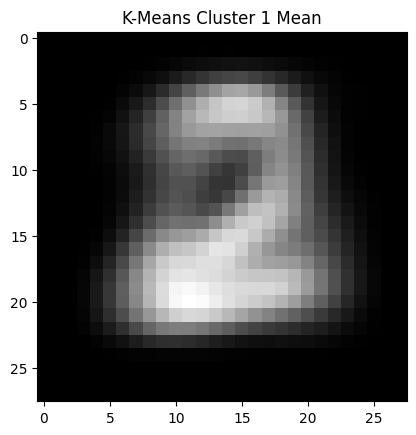

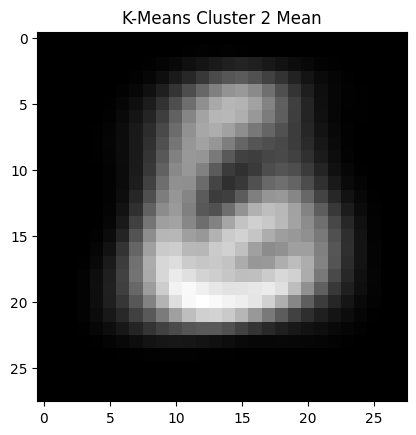

In [70]:
em_labels = np.argmax(tau, axis=1)

em_labels[em_labels == 0] = 2
em_labels[em_labels == 1] = 6

em_mismatch = np.mean(em_labels != labels)
print(f"GMM Misclassification Rate: {em_mismatch:.4f}")

np.random.seed(42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(pdata)
kmeans_labels = kmeans.labels_

cluster_mean = np.array([np.mean(labels[kmeans_labels == i]) for i in range(2)])

if cluster_mean[0] > cluster_mean[1]:
    kmeans_labels[kmeans_labels == 0] = 6
    kmeans_labels[kmeans_labels == 1] = 2
else:
    kmeans_labels[kmeans_labels == 0] = 2
    kmeans_labels[kmeans_labels == 1] = 6

kmeans_mismatch = np.mean(kmeans_labels != labels)
print(f"K-Means Misclassification Rate: {kmeans_mismatch:.4f}")

if em_mismatch < kmeans_mismatch:
    print("GMM achieves better performance than K-Means")
else:
    print("K-Means achieves better performance than GMM")

kmeans_centers = kmeans.cluster_centers_

center_0 = (V @ np.diag(np.sqrt(Sig[:d])) @ kmeans_centers[0]).reshape(28, 28)
center_0 = np.fliplr(center_0)
center_0 = ndimage.rotate(center_0, 90, reshape=False)
plt.imshow(center_0, cmap="gray")
plt.title("K-Means Cluster 1 Mean")
plt.savefig("q3-output/kmeans_cluster_1.jpg")
plt.show()

center_1 = (V @ np.diag(np.sqrt(Sig[:d])) @ kmeans_centers[1]).reshape(28, 28)
center_1 = np.fliplr(center_1)
center_1 = ndimage.rotate(center_1, 90, reshape=False)
plt.imshow(center_1, cmap="gray")
plt.title("K-Means Cluster 2 Mean")
plt.savefig("q3-output/kmeans_cluster_2.jpg")
plt.show()
